Cifar-10 Project_0 val 88퍼센트 test 87퍼센트

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

Data uploading  

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

Data Prerposessing

In [5]:
# Normalization
x_train=x_train/.255

x_test=x_test/.255

#One-hot encoding
y_train = tf.keras.utils.to_categorical(np.array(y_train))
y_test = tf.keras.utils.to_categorical(np.array(y_test))

In [6]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [6]:
x_train.shape

(45000, 32, 32, 3)

Model 정의(CNN 기반)

In [7]:
def get_model():
    
    model=Sequential([
        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Flatten(),
        
        Dense(units=128,activation='relu'),
        BatchNormalization(),
        Dense(units=64,activation='relu'),
        Dropout(0.3),
        Dense(units=10,activation='softmax') 
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),loss='categorical_crossentropy',metrics=['acc'],)

    return model

In [8]:
model_checkpoint_best_path=r'.\checkpoint_best'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')

early_stopping=EarlyStopping(monitor='val_acc',patience=20,min_delta=1e-4)

In [ ]:
model.summary()

Model 학습

In [9]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [10]:
model=get_model()
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val),verbose=1,callbacks=[model_checkpoint_best,early_stopping])

Epoch 1/100
1407/1407 [==============================] - 43s 26ms/step - loss: 1.5296 - acc: 0.4450 - val_loss: 1.2460 - val_acc: 0.5512
Epoch 2/100
1407/1407 [==============================] - 36s 26ms/step - loss: 0.9885 - acc: 0.6573 - val_loss: 0.8831 - val_acc: 0.6936
Epoch 3/100
1407/1407 [==============================] - 36s 26ms/step - loss: 0.7712 - acc: 0.7396 - val_loss: 0.6818 - val_acc: 0.7642
Epoch 4/100
1407/1407 [==============================] - 36s 25ms/step - loss: 0.6377 - acc: 0.7869 - val_loss: 0.6726 - val_acc: 0.7746
Epoch 5/100
1407/1407 [==============================] - 36s 26ms/step - loss: 0.5345 - acc: 0.8224 - val_loss: 0.5628 - val_acc: 0.8094
Epoch 6/100
1407/1407 [==============================] - 36s 26ms/step - loss: 0.4525 - acc: 0.8510 - val_loss: 0.5136 - val_acc: 0.8264
Epoch 7/100
1407/1407 [==============================] - 36s 25ms/step - loss: 0.3867 - acc: 0.8732 - val_loss: 0.5182 - val_acc: 0.8338
Epoch 8/100
1407/1407 [==================

In [12]:
model=get_model()
model.load_weights(model_checkpoint_best_path)
test_loss,test_acc=model.evaluate(x=x_val,y=y_val,verbose=1)

157/157 [==============================] - 1s 7ms/step - loss: 0.6627 - acc: 0.8816


Train 및 Validation acc 시각화

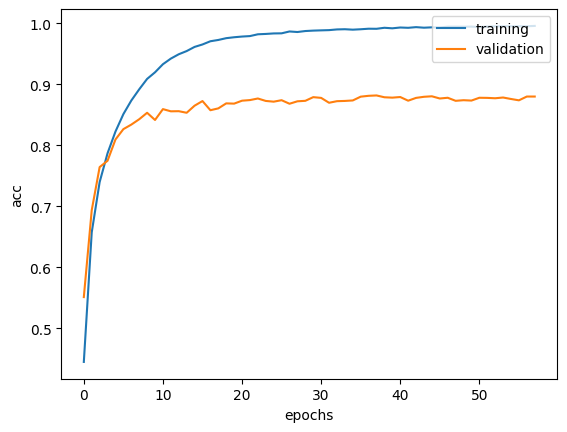

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()

Test dataset 검증

In [14]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.6963 - acc: 0.8736
